# Plan de l'étude

1) Introduction

2) Acquisition des données

3) Nettoyage des données

4) Exploration et analyse des données

5) Quantification de la qualité d'un nutriment

6) Propositions d'aliments pour une recette




# Introduction

## Avertissements

L'utilisation de ce Notebook nécessite une capacité minimale de 2Go de RAM

Le chargement de la base de données nécessite 1.5Go de RAM.

Pour charger les données du fichier de données, ce dernier doit être localisé dans le répertoire ./tmp, au même niveau que le notebook. 

## Formulation du problème

L'étude présentée ci-dessous vise à accompagner la composition des recettes saines à partir d'une base alimentaire. Un recette est comprise ici comme une combinaison d'aliments de la base.

Etant donné le niveau calorique d'un repas rapporté à 100g d'aliments issus de la base de données, quels aliments sont ils susceptibles de rentrer dans une recette saine?

Hypothèse : une recette saine et composée d'aliments sains.
-----------

Pour pouvoir répondre à cette question, cette dernière a été reformulée comme suit : 

Reformulation
---------------

"Y a t-il un lien entre la classe énergétique d'un aliment et son scoring?"

Pour mener à bien cette étude, nous avons fait le choix des options suivantes: 

 1) L'apport énergétique est la variable autour de laquelle l'étude va s'articuler
 
 2) L'étude a été abordée sous l'angle de l'analyse des nutriments. Ces derniers ont été décomposés en deux classes :
 
     a) la classe des nutriments qui contribuent positivement à une recette saine, 
     
     b) la classe des nutriments qui contribue négativement à une recette saine.
 
 3) La statistique descriptive a été mise au service de l'analyse de la base de données.

Au fil de l'analyse, des recommandations d'aliments pour composer une recette vont être proposées.

# Fonctions et structures utilitaires

## Structures

In [1]:
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}


# Les categories de nutriments qui font la qualité d'un aliment sont stockés en variables de classe sous forme de dictionaires.
# C'est une sous-catégorie de NUTRITION_CATEG.

NUTRITION_QUALITY_CATEG = {
                # ---------  Protéines ------------------------
                'proteins_100g' : 'PROTEINES',
                'casein_100g' : 'PROTEINES',
                'serum-proteins_100g' : 'PROTEINES',
                'nucleotides_100g' : 'PROTEINES',
                'biotin_100g' : 'PROTEINES',

                # -------- Acides gras insaturés --------------
                'alpha-linolenic-acid_100g' : 'ACIDES GRAS',# AG polyinsaturé  : classe oméga-3
                'eicosapentaenoic-acid_100g' : 'ACIDES GRAS',# AG polyinsaturé  : classe oméga-3
                'docosahexaenoic-acid_100g' : 'ACIDES GRAS',# AG polyinsaturé  : classe oméga-3
                'linoleic-acid_100g' : 'ACIDES GRAS',        # AG polyinsaturé  : classe oméga-6
                'arachidonic-acid_100g' : 'ACIDES GRAS',     # AG polyinsaturé  : classe oméga-6     
                'gamma-linolenic-acid_100g' : 'ACIDES GRAS', # AG polyinsaturé  : classe oméga-6  
                'dihomo-gamma-linolenic-acid_100g' : 'ACIDES GRAS',        # AG insaturés :classe oméga-6
                'oleic-acid_100g' : 'ACIDES GRAS',       # AG mono-insaturés :classe  oméga-9
                'elaidic-acid_100g' : 'ACIDES GRAS',     # AG insaturé
                'gondoic-acid_100g' : 'ACIDES GRAS',     # AG insaturé
                'mead-acid_100g' : 'ACIDES GRAS',        # AG insaturé
                'erucic-acid_100g' : 'ACIDES GRAS',      # AG insaturé
                'nervonic-acid_100g' : 'ACIDES GRAS',    # AG insaturé                           
                'pantothenic-acid_100g' : 'ACIDES GRAS',  #No

                # -------- Vitamines  --------------
                'vitamin-a_100g' : 'VITAMINES',        
                'vitamin-d_100g' : 'VITAMINES',        
                'vitamin-e_100g' : 'VITAMINES',        
                'vitamin-k_100g' : 'VITAMINES',        
                'vitamin-c_100g' : 'VITAMINES',        
                'vitamin-b1_100g' : 'VITAMINES',        
                'vitamin-b2_100g' : 'VITAMINES',        
                'vitamin-pp_100g' : 'VITAMINES',        
                'vitamin-b6_100g' : 'VITAMINES',        
                'vitamin-b9_100g' : 'VITAMINES',        
                'vitamin-b12_100g' : 'VITAMINES',                            

                # -------- Sels minéraux  --------------
                'taurine_100g' : 'SELS MINERAUX',        
                'caffeine_100g' : 'SELS MINERAUX',        
                'iodine_100g' :   'SELS MINERAUX',        
                'molybdenum_100g' : 'SELS MINERAUX',        
                'chromium_100g' : 'SELS MINERAUX',        
                'selenium_100g' : 'SELS MINERAUX',        
                'fluoride_100g' : 'SELS MINERAUX',        
                'manganese_100g' : 'SELS MINERAUX',        
                'copper_100g' :    'SELS MINERAUX',        
                'zinc_100g' :      'SELS MINERAUX',        
                'magnesium_100g' : 'SELS MINERAUX',        
                'iron_100g' :       'SELS MINERAUX',        
                'phosphorus_100g' : 'SELS MINERAUX',        
                'calcium_100g' :    'SELS MINERAUX',        
                'sodium_100g' :     'SELS MINERAUX',        
                'silica_100g' :     'SELS MINERAUX',        
                'bicarbonate_100g' :'SELS MINERAUX',        
                'potassium_100g' :  'SELS MINERAUX',        
                'chloride_100g' :   'SELS MINERAUX',        

}
NUTRITION_CATEG = { 
                'proteins_100g' : 'PROTEINES',
                'casein_100g' : 'PROTEINES',
                'serum-proteins_100g' : 'PROTEINES',
                'nucleotides_100g' : 'PROTEINES',
                'biotin_100g' : 'PROTEINES',

                'carbohydrates_100g' : 'GLUCIDES',

                'sugars_100g' : 'GLUCIDES',

                'sucrose_100g' : 'GLUCIDES',
                'glucose_100g' : 'GLUCIDES',
                'fructose_100g' :'GLUCIDES',
                'lactose_100g' : 'GLUCIDES',
                'maltose_100g' : 'GLUCIDES',
                'lactose_100g' : 'GLUCIDES',
                'maltodextrins_100g' : 'GLUCIDES',
                'starch_100g' : 'GLUCIDES',
                'polyols_100g' : 'GLUCIDES',

                # --- Acides gras saturés ------
                'caproic-acid_100g' : 'ACIDES GRAS',#AG saturé
                'caprylic-acid_100g' : 'ACIDES GRAS',#AG saturé
                'capric-acid_100g' : 'ACIDES GRAS',#AG saturé
                'lauric-acid_100g' : 'ACIDES GRAS',#AG saturé
                'myristic-acid_100g' : 'ACIDES GRAS',#AG saturé (très répandu des AGS)
                'palmitic-acid_100g' : 'ACIDES GRAS',#AG saturé (très répandu des AGS)
                'stearic-acid_100g' : 'ACIDES GRAS',# AG saturé (le plus répandu des AGS)
                'arachidic-acid_100g' : 'ACIDES GRAS',# AG saturé
                'behenic-acid_100g' : 'ACIDES GRAS',# AG saturé
                'lignoceric-acid_100g' : 'ACIDES GRAS',# AG saturé
                'cerotic-acid_100g' : 'ACIDES GRAS',# AG saturé
                'montanic-acid_100g' : 'ACIDES GRAS', # AG saturé
                'melissic-acid_100g' : 'ACIDES GRAS', # AG saturé

                # --- Acides gras insaturés ------
                'alpha-linolenic-acid_100g' : 'ACIDES GRAS',# AG polyinsaturé  : classe oméga-3
                'eicosapentaenoic-acid_100g' : 'ACIDES GRAS',# AG polyinsaturé  : classe oméga-3
                'docosahexaenoic-acid_100g' : 'ACIDES GRAS',# AG polyinsaturé  : classe oméga-3
                'linoleic-acid_100g' : 'ACIDES GRAS',        # AG polyinsaturé  : classe oméga-6
                'arachidonic-acid_100g' : 'ACIDES GRAS',     # AG polyinsaturé  : classe oméga-6     
                'gamma-linolenic-acid_100g' : 'ACIDES GRAS', # AG polyinsaturé  : classe oméga-6  
                'dihomo-gamma-linolenic-acid_100g' : 'ACIDES GRAS',        # AG insaturés :classe oméga-6
                'oleic-acid_100g' : 'ACIDES GRAS',       # AG mono-insaturés :classe  oméga-9
                'elaidic-acid_100g' : 'ACIDES GRAS',     # AG insaturé
                'gondoic-acid_100g' : 'ACIDES GRAS',     # AG insaturé
                'mead-acid_100g' : 'ACIDES GRAS',        # AG insaturé
                'erucic-acid_100g' : 'ACIDES GRAS',      # AG insaturé
                'nervonic-acid_100g' : 'ACIDES GRAS',    # AG insaturé                   
                'pantothenic-acid_100g' : 'ACIDES GRAS',  #No

                'vitamin-a_100g' : 'VITAMINES',        
                'vitamin-d_100g' : 'VITAMINES',        
                'vitamin-e_100g' : 'VITAMINES',        
                'vitamin-k_100g' : 'VITAMINES',        
                'vitamin-c_100g' : 'VITAMINES',        
                'vitamin-b1_100g' : 'VITAMINES',        
                'vitamin-b2_100g' : 'VITAMINES',        
                'vitamin-pp_100g' : 'VITAMINES',        
                'vitamin-b6_100g' : 'VITAMINES',        
                'vitamin-b9_100g' : 'VITAMINES',        
                'vitamin-b12_100g' : 'VITAMINES',                            

                'taurine_100g' : 'SELS MINERAUX',        
                'caffeine_100g' : 'SELS MINERAUX',        
                'iodine_100g' :   'SELS MINERAUX',        
                'molybdenum_100g' : 'SELS MINERAUX',        
                'chromium_100g' : 'SELS MINERAUX',        
                'selenium_100g' : 'SELS MINERAUX',        
                'fluoride_100g' : 'SELS MINERAUX',        
                'manganese_100g' : 'SELS MINERAUX',        
                'copper_100g' :    'SELS MINERAUX',        
                'zinc_100g' :      'SELS MINERAUX',        
                'magnesium_100g' : 'SELS MINERAUX',        
                'iron_100g' :       'SELS MINERAUX',        
                'phosphorus_100g' : 'SELS MINERAUX',        
                'calcium_100g' :    'SELS MINERAUX',        
                'sodium_100g' :     'SELS MINERAUX',        
                'silica_100g' :     'SELS MINERAUX',        
                'bicarbonate_100g' :'SELS MINERAUX',        
                'potassium_100g' :  'SELS MINERAUX',        
                'chloride_100g' :   'SELS MINERAUX',        

                #'alcohol_100g' : 'ALCOHOL',        

                'fiber_100g' : 'FIBRES',        

                'saturated-fat_100g' : 'LIPIDES',
                'monounsaturated-fat_100g' : 'LIPIDES',
                'polyunsaturated-fat_100g' : 'LIPIDES',
                'omega-3-fat_100g' : 'LIPIDES',
                'omega-6-fat_100g' : 'LIPIDES',
                'omega-9-fat_100g' : 'LIPIDES',
                'trans-fat_100g' : 'LIPIDES',
                'cholesterol_100g' : 'LIPIDES',
                #'fat_100g' : 'LIPIDES',
               }


## Fonctions

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline  

%reload_ext autoreload
%autoreload 2

%aimport SeriesExplorer
from SeriesExplorer import *



#------------------------------------------------------------------------------
#
#------------------------------------------------------------------------------
def remove_pattern(myList,pattern) :
    new_list = list()
    for elt in myList :
        new_list.append(elt.replace(pattern, ''))
    return new_list
#------------------------------------------------------------------------------

#------------------------------------------------------------------------------
#
#------------------------------------------------------------------------------
def filter_nan(val) :
    if np.nan is not val :
        return val
#------------------------------------------------------------------------------

#------------------------------------------------------------------------------
#
#------------------------------------------------------------------------------
def df_dimensions(dataframe, verbose=True) :
    #lines = len(dataframe)
    #columns = len(dataframe.iloc[0,:])
    lines, columns = dataframe.shape
    if verbose is True :
        print("-------oOo-------")
        print("Nombre (lignes, colonnes)  = ({},{}) ".format(lines, columns))    
        print("Utilisation mémoire : {} bytes ".format(sum(dataframe.memory_usage(deep=True))))
        print("-------oOo-------")
    return lines, columns
#------------------------------------------------------------------------------

#------------------------------------------------------------------------------
#
#------------------------------------------------------------------------------
def build_list_target_intake(dict_nutrient_intake, target_category) :
    dict_targetCategory_intake = dict()

    for nutrient in SeriesExplorer.NUTRITION_CATEG.keys() :
        if SeriesExplorer.NUTRITION_CATEG[nutrient] == target_category :
            if nutrient in dict_nutrient_intake.keys() :
                dict_targetCategory_intake[nutrient] = dict_nutrient_intake[nutrient]
                #print('Nutrient = {} / Intake = {}'.format(nutrient, dict_nutrient_intake[nutrient]))
    return dict_targetCategory_intake
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_describe_by_range(df,range_columns) :
    count = 0
    start = 0
    count_df = 0
    dict_df = dict()
    for column in df.columns :
        if 0 < count%range_columns or 0 == count:
            count += 1
        else :
            dict_df[count_df] = df.iloc[:,start:count].describe()
            start = count
            count += 1
            count_df +=1
    for item in dict_df.keys() :
        print(dict_df[item])
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_remove_nutrient(df, list_nutrient) :
    """ Delete columns from dataframe.
        Columns to be deleted are those in list given as parameter.
    """
    df_dimensions(df)
    for nutrient in list_nutrient :
        if nutrient in df.columns :
            del(df[nutrient])
    df_dimensions(df)
    return df
# ------------------------------------------------------------------------------
#------------------------------------------------------------------------------
#
#------------------------------------------------------------------------------
def df_keep_columns_from_list(dataframe, list_columns) :
    """Purge les colonnes d'un objet de type DataFrame à partir d'une 
    liste passée en argument.
    Les colonnes qui ne sont pas dans la liste sont purgées.
    Return : le dataframe purgé.
    """
    for col in dataframe.columns:
        if col not in list_columns :
            del dataframe[col]
    df_dimensions(dataframe)
    return dataframe
#------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_change_erratic_values(df, correction_factor=0) :
    list_index_drop = list()
    df_dimensions(df)
    # Constitution de la liste des index de lignes a dropper.
    for index in df.index :
        for nutrient in df.columns :
            nutrient_value = df.loc[index,nutrient]
            food_name = df.loc[index,'product_name']
            if( isinstance(nutrient_value,float) and nutrient_value is not np.nan and 0 > nutrient_value ) :
                print("Food : {} / Nutriment : {} / Index= {} / Value= {} --> {}".format(food_name,nutrient, index, nutrient_value, abs(correction_factor*nutrient_value)))
                list_index_drop.append(index)
                df.loc[index,nutrient] = correction_factor*nutrient_value
    list_index_drop
    #df_tmp = df.drop(list_index_drop)
    df_dimensions(df)
    return df
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_drop_columns_zmin_equal_zmax(df) :
    """Drop all columns for which zmin = zmax.
    Drop all columns for which quantile 3/4 is 0.
    """
    df_dimensions(df)
    list_columns = list(df.columns)
    #print(list_columns)
    nutrition_categ = remove_pattern(NUTRITION_CATEG,'_100g')
    
    for nutrient in nutrition_categ :
        if nutrient in list_columns :
            zmin, zmax = df_boxplot_min_max(df , nutrient)
            if( isinstance(zmin,float) and zmin is not np.nan ) :
                if( isinstance(zmax,float) and zmax is not np.nan ) :
                    if zmax <= zmin   : 
                        # print("Purge nutrient = {}".format(nutrient))
                        del(df[nutrient])

    list_columns = list(df.columns)
    for nutrient in nutrition_categ :
        if nutrient in list_columns :
            if df[nutrient].quantile(3/4) == 0 :
                del(df[nutrient])
        
    df_dimensions(df)
    return df
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_drop_columns_min_equal_max(df) :
    """Drop all columns belonging to SeriesExplorer.NUTRITION_CATEG list and 
    from wich min and max values are equals.
    """

    df_dimensions(df)
    nutrition_categ = remove_pattern(NUTRITION_CATEG,'_100g')
    for nutrient in df.columns :
        if nutrient in nutrition_categ :
            # print(df_food[nutrient].min())
            is_not_filtered = df[nutrient].min() < df[nutrient].max()
            if is_not_filtered == False : 
                print("Purge nutrient = {}".format(nutrient))
                del(df[nutrient])
    df_dimensions(df)
    return df
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_remove_duplicates(df) :
    """Remove duplicated raws from dataframe given as parameter.
        dataframe index is reseted in order to have a smoothly operation.
    """
    df_dimensions(df)

    df = df.reset_index()
    for column in df.columns :
        df[column].drop_duplicates(inplace=True, keep='first')

    df_dimensions(df)
    return df
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_merge_columns(df, column_dest, column_src) :
    """Merge column_src into column_dest for a given df.
       Once done, column_dest is removed from df.
    """
    if column_src in df  :
        df[column_dest] = SeriesExplorer.mergeSeries(df[column_dest], df[column_src])

        # Purge des colonnes 'generic_name','categories'
        del(df[column_src])

    df_dimensions(df)
    return df
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_drop_raws_from_nan_value(df, column) :
    """ Drop whole raw where nan value stand in column.
    """
    if column not in df :
        return df

    df_dimensions(df)

    ser = pd.Series(df[column], index= df.index)
    ser.dropna(axis=0 , inplace=True)
    del(df[column])
    df = pd.concat((df,ser), axis=1, join='inner')

    df_dimensions(df)
    
    return df
        
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_drop_columns_from_nan_threshold(df, nan_threshold, verbose=True) :
    """Remove nutrients from dataframe according to nan value threshold given as parameter.
        Parameters : 
            threshold : value under which nutrient is dropped.
            df : dataframe on which operation applies.
    """
    if verbose :
        df_dimensions(df)

    df_len = len(df)
    for nutrient in df.columns :
        if nutrient != 'product_name' :
            # Getting all nan values from nutrient and storing them into df_sample
            df_sample = df[np.isnan(df_food[nutrient])]
            nutrient_rate = 1. - (len(df_sample)/df_len)
            if  nan_threshold > nutrient_rate  :
                del(df[nutrient])
    if verbose :
        df_dimensions(df)
    return df
# ------------------------------------------------------------------------------


# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_scan_nan_threshold(df, step=10) :
    """ Display numbers columns considering % of nan values 
    This function repeatively calls function df_drop_columns_from_nan_threshold
    """
    index = 0
    
    dict_scan_nan_threshold = dict()
    
    df_save = df.copy()
    while index <= 100 :
        df = df_save.copy()
        nan_threshold = index/100
        df = df_drop_columns_from_nan_threshold(df, nan_threshold, verbose=False)
        lines, columns = df_dimensions(df, verbose=False)
        #dict_nutrient_count[nan_threshold] = columns
        index +=step
        print('Seuil= {}% / Nutriments= {}'.format(nan_threshold*100, columns))
        dict_scan_nan_threshold[nan_threshold] = columns
    return dict_scan_nan_threshold
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_range_column(df,column,val_min,val_max) :
    """ Returns a datafram from which values from the given column 
    are val_min < values <= val_max
    """

    df1 = df[df[column] <= val_max]
    df2 = df1[df1[column] >  val_min]
    return df2
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
# Assignation des operations a une categorie et a un type
# ------------------------------------------------------------------------------
def detect_words(values, dictionary):
    result = []
    for lib in values:
        operation_type = "AUTRE"
        for word, val in dictionary.items():
            if word in lib:
                operation_type = val
        result.append(operation_type)
    return result
# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def build_nutrient_quality_dict(df) :
    """ Build a dictionary for nutrient quality.
        Indexes from dictionary are index values from df
        Values : for each raw, compute of cumulative sum over all nutrients
    """

    #ser_quality_nutrient = pd.Series()
    dict_nutrient_value = dict()

    # This initialisation allows cumulative sum
    for index in df.index :
        dict_nutrient_value[index] = 0.0
    
    for nutrient in df.columns : 
        if nutrient in NUTRITION_QUALITY_CATEG :
            for nutrient_index, nutrient_value in df[nutrient].iteritems() :
                if( isinstance(nutrient_value,float) and nutrient_value is not np.nan and 0 < nutrient_value ) :    
                    #if nutrient_index in dict_nutrient_value.keys() and 0 < dict_nutrient_value[nutrient_index]:
                    # Nutrient already exists; it can be cumulated 
                    dict_nutrient_value[nutrient_index] += nutrient_value
                    #else :
                        # Initialization 
                        #dict_nutrient_value[nutrient_index]  = nutrient_value
                #else  :
                    # Permettra par la suite de remplacer ces valeurs par la médiane
                    # dict_nutrient_value[nutrient_index] = -1
                    #dict_nutrient_nan[nutrient_index] = np.nan
                    #pass
                #list_index.append(nutrient_index)

    len(dict_nutrient_value)
    #dict_nutrient_value
    return dict_nutrient_value
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_sns_joint_plot(df, var1, var2, parameter_kind='reg', parameter_color='grey') :
    with sns.axes_style('white'):
        sns.jointplot(var1, var2, data=df, kind = parameter_kind, color = parameter_color)    

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_boxplot_min_max(df , nutrient) :
    """Retourne les valeurs extremes des moustaches d'un nutriment.
    """
    z = pd.DataFrame(df[nutrient]).describe()
    
    q1 = z.loc['25%',nutrient]
    q3 = z.loc['75%',nutrient]

    # Calcul des moustaches
    zmin1 = z.loc['min',nutrient]
    zmin2 = q1-(q3-q1)*1.5
    zmin = max(zmin1,zmin2)

    zmax1 = z.loc['max',nutrient]
    zmax2 = q3+(q3-q1)*1.5
    zmax = min(zmax1,zmax2)

    return zmin,zmax
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_boxplot_display(df_food, nutrient) :
    z = pd.DataFrame(df_food[nutrient]).boxplot(showfliers= False, patch_artist=True, medianprops=medianprops,showmeans=True, meanprops=meanprops)
# ------------------------------------------------------------------------------


# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_boxplot_list_display(df,list_var ) :
    """ Display boxplot of filtered values from dataframe given as parameter.
    Filtered values are those in list_var.
    Statistics dispersions are also displayed.
    """

    for var in list_var :
        print("="*60)
        print(str(var).center(60,'-'))
        print("Moyenne: {}".format(df[var].mean()))
        print("Mediane: {}".format(df[var].median()))
        print("Modes: {}".format(df[var].mode()))
        print("Variance: {}".format(df[var].var(ddof=0)))
        print("Ecart:{}".format(df[var].std(ddof=0)))
        df_food.boxplot(column=var, vert=False, showfliers=False, patch_artist=True, medianprops=medianprops,showmeans=True, meanprops=meanprops)
        plt.show()
# ------------------------------------------------------------------------------


# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_display_hist_from_list(df_food, list_columns) :
    """ Display histograms issued from dataframe and filetered from list given 
    as parameter.
    Histogram represents frequencies from dataframe for each column from list_columns.
    """
    z = plt.figure(figsize=(4,4))
    for column in list_columns :
        df = df_food.copy()
        zmin, zmax = df_boxplot_min_max(df, column)
        if zmin < zmax :
            list_name = remove_pattern([column],'100g')
            new_column = list_name[0]
            df.rename(columns={column: new_column}, inplace=True)
            column = new_column
            df = pd.DataFrame(df[column], index=df.index)
            df = df[df[column] <= zmax]
            df = df[df[column] >= zmin]
            df = df[df[column] > 0.0]
            #z = plt.figure()
            z = df.plot.hist(bins=50)
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_display_dict_hist(dict_to_display, title, xlabel, ylabel, fontSize, color):

    # Gestion de l'affichage
    fig, ax = plt.subplots()
    plt.rcParams.update({'font.size': fontSize})

    plt.title(title)
    ax.set_xlabel(xlabel, fontsize = fontSize, color=color)
    ax.set_ylabel(ylabel, fontsize = fontSize, color=color)
    ax.tick_params(axis='x', rotation=90)

    list_values   = dict_to_display.values()
    bar_locations = dict_to_display.keys()

    z = plt.bar(bar_locations, list_values, align='center', width=0.5)
    return

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_build_scoring_from_listing_1(df_food, list_nutrient_minus, list_nutrient_plus) :
    dict_scoring = dict()
    for index in df_food.index :
        dict_scoring[index] = 0.0

    # Calcul des perciles pour le scoring
    dict_nutrient_plus  = dict()
    dict_nutrient_minus = dict()

    for nutrient in list_nutrient_plus : 
        dict_nutrient_plus[nutrient]={'Q1':df_food[nutrient].quantile(1/4), 'Q2':df_food[nutrient].quantile(2/4), 'Q3':df_food[nutrient].quantile(3/4)}

    for nutrient in list_nutrient_minus : 
        dict_nutrient_minus[nutrient]={'Q1':df_food[nutrient].quantile(1/4), 'Q2':df_food[nutrient].quantile(2/4), 'Q3':df_food[nutrient].quantile(3/4)}

    for index in df_food.index :
        scoring_aliment = 0.0
        for nutrient_plus in list_nutrient_plus :
            nutrient_fact = df_food.loc[index,nutrient_plus]
            if nutrient_fact == 0.0 :
                scoring_aliment = 0
            elif 0 < nutrient_fact and nutrient_fact <= dict_nutrient_plus[nutrient_plus]['Q2'] :
                scoring_aliment = 1
            elif dict_nutrient_plus[nutrient_plus]['Q2'] < nutrient_fact :
                scoring_aliment = 2
            else :
                pass
            dict_scoring[index] += scoring_aliment

        for nutrient_minus in list_nutrient_minus :
            nutrient_fact = df_food.loc[index,nutrient_minus]
            if nutrient_fact == 0.0 :
                scoring_aliment = 0
            elif 0 < nutrient_fact and nutrient_fact <= dict_nutrient_minus[nutrient_minus]['Q2'] :
                scoring_aliment = -1
            elif dict_nutrient_minus[nutrient_minus]['Q2'] < nutrient_fact :
                scoring_aliment = -2
            else :
                pass
            dict_scoring[index] += scoring_aliment

    len(dict_scoring)
    
    df_scoring = pd.DataFrame(dict_scoring, columns=list(dict_scoring.keys()), index=['scoring_1'])
    df_scoring = df_scoring.transpose()

    return df_scoring
# ------------------------------------------------------------------------------


# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_build_scoring_from_listing_2(df_food, list_nutrient_minus, list_nutrient_plus) :
    dict_scoring = dict()
    for index in df_food.index :
        dict_scoring[index] = 0.0

    # Calcul des perciles pour le scoring
    dict_nutrient_plus  = dict()
    dict_nutrient_minus = dict()

    for nutrient in list_nutrient_plus : 
        dict_nutrient_plus[nutrient]={'Q1':df_food[nutrient].quantile(1/4), 'Q2':df_food[nutrient].quantile(2/4), 'Q3':df_food[nutrient].quantile(3/4)}


    for nutrient in list_nutrient_minus : 
        dict_nutrient_minus[nutrient]={'Q1':df_food[nutrient].quantile(1/4), 'Q2':df_food[nutrient].quantile(2/4), 'Q3':df_food[nutrient].quantile(3/4)}

    # Scoring par aliment        
        
    for index in df_food.index :
        scoring_aliment = 0.0
        for nutrient_plus in list_nutrient_plus :
            nutrient_fact = df_food.loc[index,nutrient_plus]
            if nutrient_fact == 0.0 :
                scoring_aliment = 0
            elif 0 < nutrient_fact and nutrient_fact <= dict_nutrient_plus[nutrient_plus]['Q1'] :
                scoring_aliment = 1                
            elif dict_nutrient_plus[nutrient_plus]['Q1'] < nutrient_fact and nutrient_fact <= dict_nutrient_plus[nutrient_plus]['Q2'] :
                scoring_aliment = 2
            elif dict_nutrient_plus[nutrient_plus]['Q2'] < nutrient_fact and nutrient_fact <= dict_nutrient_plus[nutrient_plus]['Q3']:
                scoring_aliment = 3
            elif dict_nutrient_plus[nutrient_plus]['Q3'] < nutrient_fact :
                scoring_aliment = 4
            else :
                pass
            dict_scoring[index] += scoring_aliment

        for nutrient_minus in list_nutrient_minus :
            nutrient_fact = df_food.loc[index,nutrient_minus]
            if nutrient_fact == 0.0 :
                scoring_aliment = 0
            elif 0 < nutrient_fact and nutrient_fact <= dict_nutrient_minus[nutrient_minus]['Q1'] :
                scoring_aliment = -1
            elif dict_nutrient_minus[nutrient_minus]['Q1'] < nutrient_fact and nutrient_fact <= dict_nutrient_minus[nutrient_minus]['Q2'] :
                scoring_aliment = -2
            elif dict_nutrient_minus[nutrient_minus]['Q2'] < nutrient_fact and nutrient_fact <= dict_nutrient_minus[nutrient_minus]['Q3']:
                scoring_aliment = -3
            elif dict_nutrient_minus[nutrient_minus]['Q3'] < nutrient_fact :
                scoring_aliment = -4
            else :
                pass
            dict_scoring[index] += scoring_aliment

    len(dict_scoring)
    
    df_scoring = pd.DataFrame(dict_scoring, columns=list(dict_scoring.keys()), index=['scoring_2'])
    df_scoring = df_scoring.transpose()

    return df_scoring
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def get_dict_category_count(df) :  
    """ Computes nutrients categories frequencies .
    """
    dict_category_count = dict()
    dict_category_freq  = dict()
    dict_nutrition_categ= dict()
    
    # Initialization 
    for category in NUTRITION_CATEG.values() :   
        dict_category_count[category] =0

    for item, value in NUTRITION_CATEG.items() :
        returned_list = remove_pattern([item],'_100g')
        dict_nutrition_categ[returned_list[0]] = value

    total_nutriment = len(dict_nutrition_categ)
    nutrient_sum = 0
    # For all columns : 
    for nutrient in df_food :
        if nutrient in dict_nutrition_categ.keys() :
            category = dict_nutrition_categ[nutrient]
            # For all values on column 
            for key, intakeValue in df_food[nutrient].iteritems() :
                if 0 < intakeValue :
                    dict_category_count[category] += 1
                    nutrient_sum += 1  

    for category in dict_nutrition_categ.values() :   
        dict_category_freq[category] = dict_category_count[category]/nutrient_sum
                
    return dict_category_count, dict_category_freq
    
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_recomandations_display( df_food, score, countMax=10) :
    """ Affiche les aliments dont le scoring dans la colonne du même nom 
    est superieur à la valeur score passée en paramètre.
    """
    #threadsold = df_food[score].median()
    threadsold = df_food[score].quantile(3/4)
    print(threadsold)
    count = 0
    #zmin, zmax = df_boxplot_min_max(df_food, column)
    
    for index in df_food.index :
        value = df_food.loc[index,score]
        if  value >= threadsold :
            if count < countMax :
                food_name = df_food.loc[index,'product_name']
                if  isinstance(food_name, str) :
                    if(1 < len(food_name)) :
                        print(df_food.loc[index,'product_name'])
                        count += 1
            else :
                break
    print("\n --------------------- ")            
    count = 0
    threadsold = df_food[score].quantile(1/4)
    print(threadsold)
    for index in df_food.index :
        value = df_food.loc[index,score]
        if  value < threadsold :
            if count < 10 :
                food_name = df_food.loc[index,'product_name']
                if  isinstance(food_name, str) :
                    if(1 < len(food_name)) :
                        print(df_food.loc[index,'product_name'])
                        count += 1
            else :
                break
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# Distribution empirique des apports par categorie de nutriments
# ------------------------------------------------------------------------------
""" Construit et renvoie un dictionnaire contenant
     * en indexes, la liste de categories de nutriments 
     * en valeurs, la contribution en g des categories de nutriments à la base alimentaire.
"""
def df_build_dict_nutrientCategory_intake(df_food) :
    # Initialisation
    dict_nutrientCategory_intake = dict()
    dict_nutrient_intake        = dict()
    dict_nutrition_categ        = dict()

    for category in NUTRITION_CATEG.values() :
        dict_nutrientCategory_intake[category] = 0

    for item, value in NUTRITION_CATEG.items() :
        returned_list = remove_pattern([item],'_100g')
        dict_nutrition_categ[returned_list[0]] = value
        
    for nutrient in df_food.columns:
        if nutrient in dict_nutrition_categ :
            dict_nutrient_intake[nutrient] = 0

    
    for nutrient in df_food.columns:
        if nutrient in  dict_nutrition_categ:
            dict_nutrient_intake[nutrient] = df_food[nutrient].sum()

    for nutrient in list_nutrient:
        if nutrient in dict_nutrition_categ :
            category = dict_nutrition_categ[nutrient]
            dict_nutrientCategory_intake[category] +=  dict_nutrient_intake[nutrient]

        
    return dict_nutrientCategory_intake
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def dict_display_lorenz(dict_to_display) :
    """Affiche la courbe de Lorenz des valeurs contenues dans le dictionnaire passé en parametre.
    Le coefficient de GINI est affiché.
    """
    ser = pd.Series(dict_to_display)
    lorenz = np.cumsum(np.sort(ser)) / ser.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

    plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
    plt.show()
    aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
    S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
    gini = 2*S
    print("\n ---> Coefficient de GINI= {}".format(gini))
# ------------------------------------------------------------------------------
    
# ------------------------------------------------------------------------------
#
# ------------------------------------------------------------------------------
def df_display_linear_regression_from_list(df_param, var_pivot,list_var) :
    """ Display linear regression between variable var_pivot given as parameter 
    and variables included into list_var given as parameter.
    """
    df_dimensions(df_param)
    for var in list_var : 
        df = df_param.copy()
        if var in df.columns :
            zmin, zmax = df_boxplot_min_max(df , var)
            df = df[df[var]<=zmax ]
            df = df[df[var]>=zmin ]
            df = df[df[var]>0.0]
            df_sns_joint_plot(df, var_pivot, var, parameter_color='grey')
            df_dimensions(df_param)
# ------------------------------------------------------------------------------
    

# Acquisition des données

In [3]:
fileName = './tmp/fr.openfoodfacts.org.products-file.csv'

df_food_raw = pd.read_csv(fileName, sep='\t', low_memory=True)

/home/bangui/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


La méthodologie a consistée à travailler sur une fraction des données de la base, contruire un modèle de données en formulant des hypothèses.

Cette fraction a été incrémentée au fil de l'létude et, une fois le modèle retenu satisfaisant, ce dernier a été étendu à l'ensemble de la base.

Les hypothèses et critères retenus pour le modéle sont expicités plus bas.

In [4]:
frac = 1.0
if frac == 1.0 :
    df_food = df_food_raw.copy()
else :
    df_food = df_food_raw.sample(frac, replace=False)
#Dimensions caractéristiques de l'échantillon : 
df_dimensions(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (320772,162) 
Utilisation mémoire : 1479277404 bytes 
-------oOo-------


(320772, 162)

Suppression du motif '_100g' dans le nom des colonnes

In [5]:
new_list = remove_pattern(list(df_food.columns),'_100g') 
df_food.columns =new_list

Simplification du modéle : 
----------------------------
1) Réduction de sa dimension en réduisant le nombre de colonnes.

2) Réduction de sa complexité en réduisant le nombre de lignes.

Justifications : 
------------------
A) Constat a été fait que toutes les informations de la base ne sont pas exploitables.
Des données quantitatives sont absentes de valeurs, des données qualitatives ne sont pas exprimées.

B) Par ailleurs, l'étude est menée principalement sous l'angle des nutriments et de l'apport énergétique.



## Fusion des colonnes complementaires : product_name, generic_name, categories

In [6]:
%aimport SeriesExplorer
from SeriesExplorer import *
df_food = df_merge_columns(df_food, 'product_name', 'generic_name')

df_food = df_merge_columns(df_food, 'product_name', 'categories')

-------oOo-------
Nombre (lignes, colonnes)  = (320772,161) 
Utilisation mémoire : 1469885828 bytes 
-------oOo-------
-------oOo-------
Nombre (lignes, colonnes)  = (320772,160) 
Utilisation mémoire : 1456712183 bytes 
-------oOo-------


## Purge des lignes dont le nom de produit n'est pas renseigné

In [7]:
df_food = df_drop_raws_from_nan_value(df_food, 'product_name')

-------oOo-------
Nombre (lignes, colonnes)  = (320772,160) 
Utilisation mémoire : 1456712183 bytes 
-------oOo-------
-------oOo-------
Nombre (lignes, colonnes)  = (304052,160) 
Utilisation mémoire : 1401828927 bytes 
-------oOo-------


## Suppression des variables non consistantes pour l'analyse

 Les variables consistantes dans le contexte de cete analyse sont les nutriments et autres variables 
 exprimées en densité energétique.
 
 Le liste des nutriments est issue du fichier qui décrit la base alimentaire.

Cette liste est constituée a partir de la lecture du fichier nutrition_fact.txt

Ce dernier est issue d'opérations d'édition sur le fichier original datafields.txt.

In [8]:
%aimport SeriesExplorer
from SeriesExplorer import *

list_nutrient_kept = SeriesExplorer.read('./data/nutrition_fact.txt')
list_nutrient_kept.append('product_name')

list_nutrient_kept = remove_pattern(list_nutrient_kept,'_100g')

In [9]:
df_food = df_keep_columns_from_list(df_food, list_nutrient_kept)

-------oOo-------
Nombre (lignes, colonnes)  = (304052,86) 
Utilisation mémoire : 226551367 bytes 
-------oOo-------


## Purge des colonnes dont toutes les valeurs sont nan

In [10]:
# axis = 1 : colonnes
# inplace=True : application au df, retour None.
# how : toutes les valeurs des colonnes a NaN
df_food.dropna(axis=1, how='all', inplace=True)
df_dimensions(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (304052,77) 
Utilisation mémoire : 204659623 bytes 
-------oOo-------


(304052, 77)

## Purge des lignes dont toutes les valeurs sont NaN :

In [11]:
#Purge des lignes dont toutes les valeurs sont NaN
df_food.dropna(axis=0, how='all', inplace=True)
df_dimensions(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (304052,77) 
Utilisation mémoire : 204659623 bytes 
-------oOo-------


(304052, 77)

In [12]:
df_save = df_food.copy()

## Traitement des valeurs erratiques

Ce traitement a fait l'objet de plusieurs tactiques.

Au final, les valeurs erratiques ont été imputées à 0.

Ce choix a semblé cohérent avec le nom des aliments qui font l'objet du traitement.


In [13]:
df_food = df_save.copy()

In [14]:
correction_factor = 0
df_food = df_change_erratic_values(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (304052,77) 
Utilisation mémoire : 204659623 bytes 
-------oOo-------
Food : Grade A Fancy Chopped Spinach / Nutriment : sugars / Index= 8582 / Value= -1.2 --> 0.0
Food : Select, Spicy Red Bell Pepper Pasta Sauce / Nutriment : sugars / Index= 18209 / Value= -0.8 --> 0.0
Food : Xtra Butter Microwave Pop Corn, Butter / Nutriment : trans-fat / Index= 23576 / Value= -3.03 --> 0.0
Food : Traditional Tender Cracklins Chicharrones / Nutriment : fiber / Index= 23784 / Value= -6.7 --> 0.0
Food : Venus, Cuttlefish Balls / Nutriment : selenium / Index= 28324 / Value= -2e-06 --> 0.0
Food : Whole Cashews / Nutriment : proteins / Index= 33781 / Value= -3.57 --> 0.0
Food : Cheez Waffies / Nutriment : vitamin-c / Index= 41538 / Value= -0.0021 --> 0.0
Food : Cocoa Dyno-Bites, Sweetened Rice Cereal With Real Cocoa / Nutriment : copper / Index= 54954 / Value= -6.896552 --> 0.0
Food : Flavor Aid, Soft Drink Mix, Lemon / Nutriment : vitamin-a / Index= 80440 / 

## Purge des colonnes dont min == max ou zmin == zmax

In [15]:
df_food = df_drop_columns_min_equal_max(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (304052,77) 
Utilisation mémoire : 213048231 bytes 
-------oOo-------
Purge nutrient = caprylic-acid
Purge nutrient = myristic-acid
Purge nutrient = palmitic-acid
Purge nutrient = stearic-acid
Purge nutrient = montanic-acid
-------oOo-------
Nombre (lignes, colonnes)  = (304052,72) 
Utilisation mémoire : 200886151 bytes 
-------oOo-------


In [18]:
df_save = df_food.copy()

In [16]:
df_food = df_drop_columns_zmin_equal_zmax(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (304052,72) 
Utilisation mémoire : 200886151 bytes 
-------oOo-------
-------oOo-------
Nombre (lignes, colonnes)  = (304052,71) 
Utilisation mémoire : 198453735 bytes 
-------oOo-------


In [188]:
df_save = df_food.copy()

## Calcul du seuil de valeurs a NaN

In [17]:
dict_scan_nan_threshold = df_scan_nan_threshold(df_food,step=5)

Seuil= 0.0% / Nutriments= 71
Seuil= 5.0% / Nutriments= 17
Seuil= 10.0% / Nutriments= 14
Seuil= 15.0% / Nutriments= 14
Seuil= 20.0% / Nutriments= 14
Seuil= 25.0% / Nutriments= 14
Seuil= 30.0% / Nutriments= 14
Seuil= 35.0% / Nutriments= 14
Seuil= 40.0% / Nutriments= 14
Seuil= 45.0% / Nutriments= 14
Seuil= 50.0% / Nutriments= 9
Seuil= 55.00000000000001% / Nutriments= 9
Seuil= 60.0% / Nutriments= 9
Seuil= 65.0% / Nutriments= 9
Seuil= 70.0% / Nutriments= 8
Seuil= 75.0% / Nutriments= 7
Seuil= 80.0% / Nutriments= 4
Seuil= 85.0% / Nutriments= 1
Seuil= 90.0% / Nutriments= 1
Seuil= 95.0% / Nutriments= 1
Seuil= 100.0% / Nutriments= 1


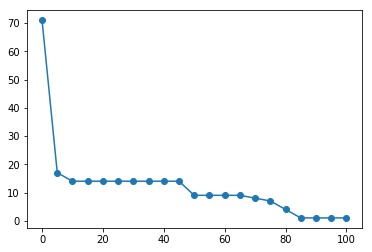

In [18]:
mylist=dict_scan_nan_threshold.values()
#plt.plot(range(0,len(dict_scan_nan_threshold)), mylist, 'o-')
plt.plot(range(0,105,5), mylist, 'o-')
plt.show()

In [19]:
nan_threshold = 45/100

In [20]:
df_food_fract = df_drop_columns_from_nan_threshold(df_food, nan_threshold)

-------oOo-------
Nombre (lignes, colonnes)  = (304052,71) 
Utilisation mémoire : 198453735 bytes 
-------oOo-------
-------oOo-------
Nombre (lignes, colonnes)  = (304052,14) 
Utilisation mémoire : 59806023 bytes 
-------oOo-------


In [21]:
df_food = df_food_fract.copy()

In [22]:
df_food.replace(np.nan, 0, inplace=True)

In [23]:
df_dimensions(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (304052,14) 
Utilisation mémoire : 51417415 bytes 
-------oOo-------


(304052, 14)

In [24]:
print("Percent of 0 values for product_name= {}%".format(len(df_food[df_food['product_name']==0])*100/df_food['product_name'].shape[0]))

Percent of 0 values for product_name= 0.0%


# Exploration et analyse des données

La population est formée d'aliments.

Les caractéristiques de cette population sont :

  a) La densité énergétique
  
  b) Les nutriments

Du point de vue nutritionnel, ces caractéristiques sont consistantes avec des recettes saines.

## Analyse univariée de la densité energétique

### Outliers de la variable energy

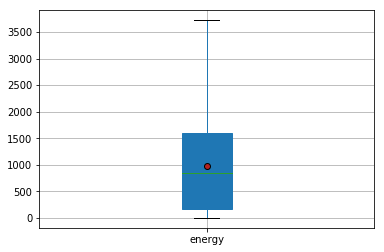

In [25]:
df_boxplot_display(df_food, 'energy')

In [26]:
df_save = df_food.copy()

L'analyse va se centrer autour des aliments qui ont une densité d'energie dans les cantiles.

Ce choix a été motivé par le fait que la prise en compte des outliers, au vu de la qualité des observations de la base, compliquait considérablement l'analyse du modéle statistique sous-jacent.

In [27]:
# Les outliers rendent difficiles la lecture et l'interprétation des graphiques.
df_dimensions(df_food)
df_food = df_food[df_food['energy']<=3500]
df_dimensions(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (304052,14) 
Utilisation mémoire : 51417415 bytes 
-------oOo-------
-------oOo-------
Nombre (lignes, colonnes)  = (302291,14) 
Utilisation mémoire : 51123509 bytes 
-------oOo-------


(302291, 14)

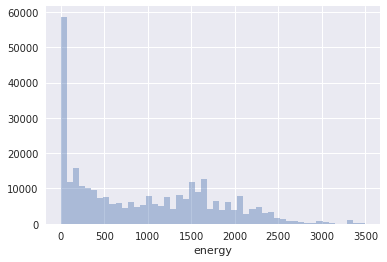

In [28]:
import seaborn as sns
sns.set()
sns.distplot(df_food['energy'], kde=False, bins=50);

In [29]:
# Densité energétique >0
df_dimensions(df_food)
df_food = df_food[df_food['energy']>0.0]
df_dimensions(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (302291,14) 
Utilisation mémoire : 51123509 bytes 
-------oOo-------
-------oOo-------
Nombre (lignes, colonnes)  = (247505,14) 
Utilisation mémoire : 42018662 bytes 
-------oOo-------


(247505, 14)

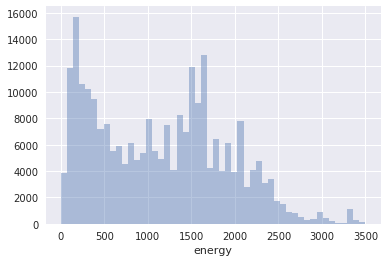

In [30]:
sns.distplot(df_food['energy'], kde=False, bins=50);

### Distributions empiriques des nutriments

2 modes émergent de la distribution de la densité energétique

In [32]:
if 'product_name' in list_nutrient :
    list_nutrient.remove("product_name")

if 'energy' in list_nutrient :
    list_nutrient.remove("energy")
list_nutrient

['fat',
 'saturated-fat',
 'cholesterol',
 'carbohydrates',
 'sugars',
 'fiber',
 'proteins',
 'sodium',
 'vitamin-a',
 'vitamin-c',
 'calcium',
 'iron']

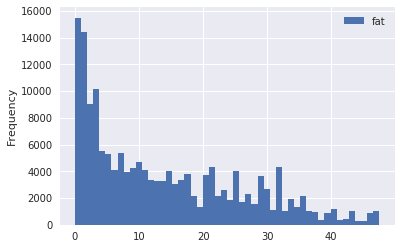

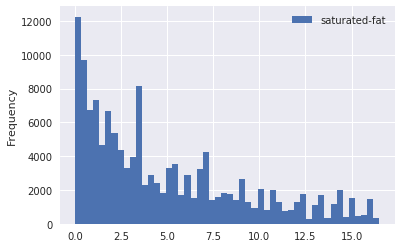

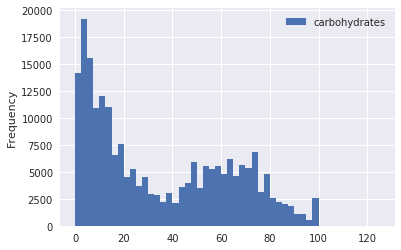

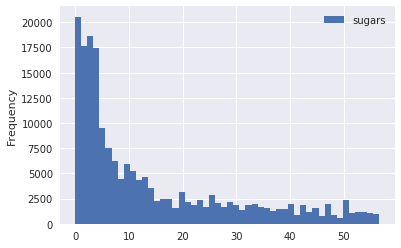

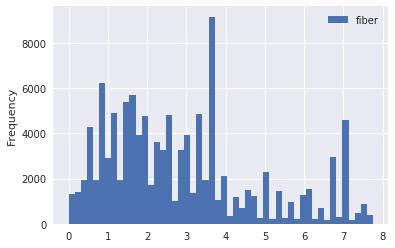

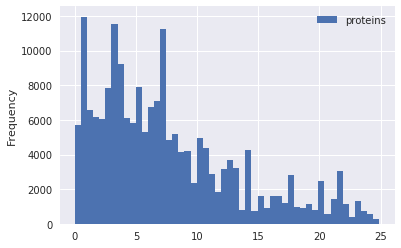

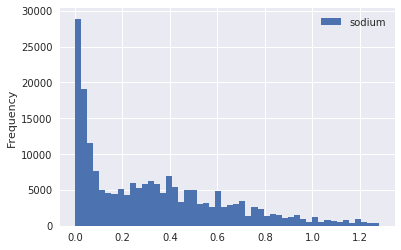

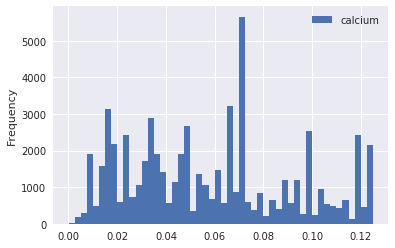

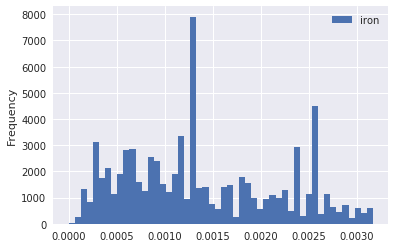

In [33]:
df_display_hist_from_list(df_food, list_nutrient )

Ces distributions nous apprennent que certains nutriments ont une distribution multi-modale.

Par ailleurs, ils sont de fréquences inégales et leur apport relatif varie d'un facteur 1000 pour certains d'entre-eux.

Il sera tenu compte de ces points pour scorer les aliments.

### Boxplot des nutriments

----------------------------fat-----------------------------
Moyenne: 11.685557912365406
Mediane: 4.0
Modes: 0    0.0
dtype: float64
Variance: 256.6102513869593
Ecart:16.019059004415936


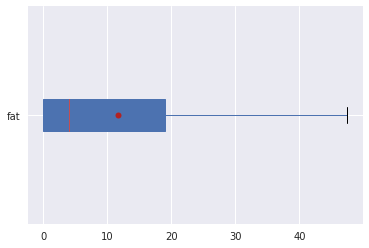

-----------------------saturated-fat------------------------
Moyenne: 4.520573131169067
Mediane: 1.18
Modes: 0    0.0
dtype: float64
Variance: 52.33467914940568
Ecart:7.234271155369122


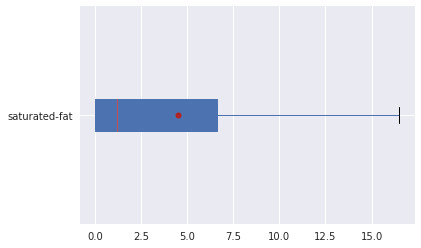

------------------------cholesterol-------------------------
Moyenne: 0.011623153249429304
Mediane: 0.0
Modes: 0    0.0
dtype: float64
Variance: 0.0747282429874119
Ecart:0.27336467033508904


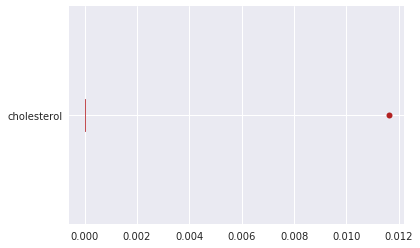

-----------------------carbohydrates------------------------
Moyenne: 30.91126301731278
Mediane: 18.9
Modes: 0    0.0
dtype: float64
Variance: 851.7991340524762
Ecart:29.18559805884533


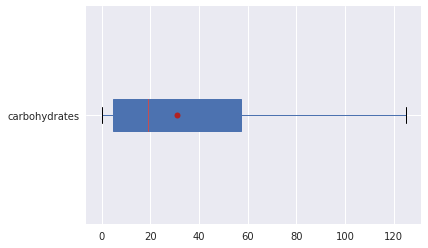

---------------------------sugars---------------------------
Moyenne: 15.54640064273449
Mediane: 5.21
Modes: 0    0.0
dtype: float64
Variance: 440.4314124144791
Ecart:20.98645783390992


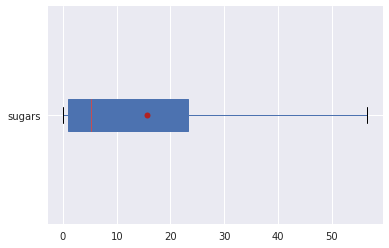

---------------------------fiber----------------------------
Moyenne: 2.264286934647785
Mediane: 0.5
Modes: 0    0.0
dtype: float64
Variance: 18.01369327954946
Ecart:4.244254148793337


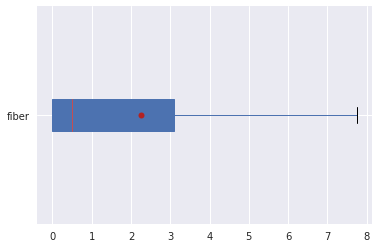

--------------------------proteins--------------------------
Moyenne: 7.322984347386921
Mediane: 5.0
Modes: 0    0.0
dtype: float64
Variance: 66.9055535942303
Ecart:8.17958150483448


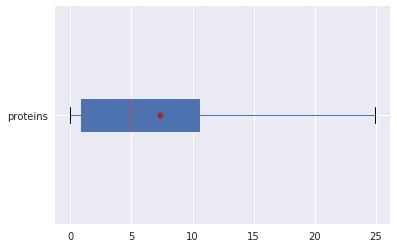

---------------------------sodium---------------------------
Moyenne: 0.6183285140418633
Mediane: 0.224
Modes: 0    0.0
dtype: float64
Variance: 2624.964154115974
Ecart:51.23440400859538


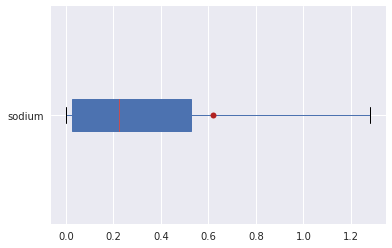

-------------------------vitamin-a--------------------------
Moyenne: 0.00021272007166723905
Mediane: 0.0
Modes: 0    0.0
dtype: float64
Variance: 0.002984217706100184
Ecart:0.05462799379530777


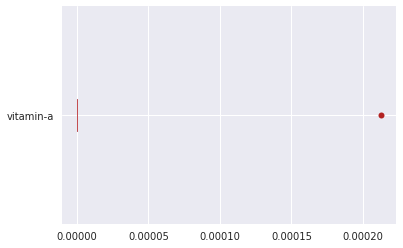

-------------------------vitamin-c--------------------------
Moyenne: 0.011543384256479668
Mediane: 0.0
Modes: 0    0.0
dtype: float64
Variance: 2.786213397167533
Ecart:1.6691954340841977


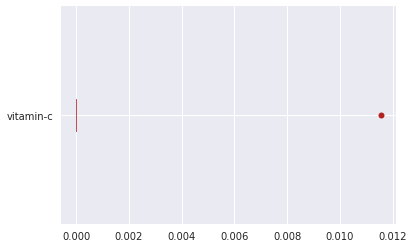

--------------------------calcium---------------------------
Moyenne: 0.0699938222944991
Mediane: 0.0
Modes: 0    0.0
dtype: float64
Variance: 6.272702877524978
Ecart:2.504536459611834


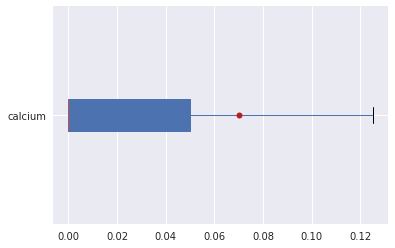

----------------------------iron----------------------------
Moyenne: 0.00203051182932062
Mediane: 0.0
Modes: 0    0.0
dtype: float64
Variance: 0.025911525265955034
Ecart:0.1609705726707681


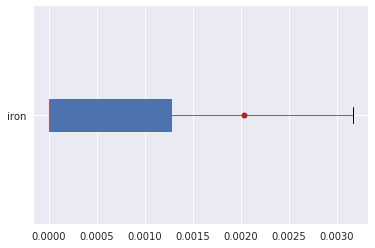

In [53]:
df_boxplot_list_display(df_food,list_nutrient )

### Distribution des catégories de nutriments dans l'alimentation

In [54]:
dict_nutrientCategory_intake = df_build_dict_nutrientCategory_intake(df_food)

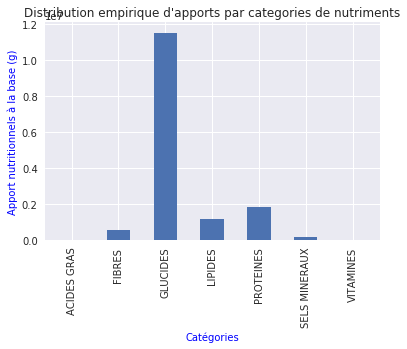

In [55]:
title  = "Distribution empirique d'apports par categories de nutriments"
xlabel = 'Catégories'
ylabel = "Apport nutritionnels à la base (g)"
fontSize = 10
color = 'b'
df_display_dict_hist(dict_nutrientCategory_intake, title, xlabel, ylabel, fontSize, color)

In [56]:
dict_nutrientCategory_count, dict_nutrientCategory_freq = get_dict_category_count(df_food)

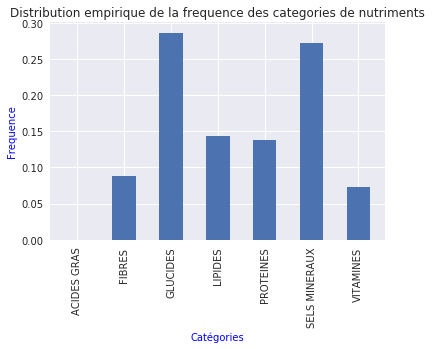

In [57]:
title = "Distribution empirique de la frequence des categories de nutriments"
xlabel = 'Catégories'
ylabel = "Frequence"
fontsize = 10
color = 'b'
df_display_dict_hist(dict_nutrientCategory_freq, title, xlabel, ylabel, fontSize, color)

Le modéle des données a fait disparaître les acides gras.

Les vitamines, à l'état de traces en termes d'apports, sont représentés dans la base de données re-modelée.

### Concentration des apports alimentaires

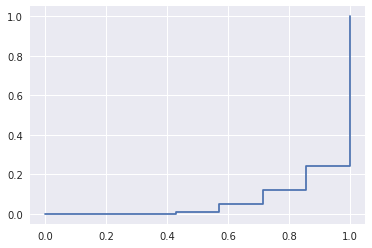


 ---> Coefficient de GINI= 0.89392643594093


In [58]:
dict_display_lorenz(dict_nutrientCategory_intake)

Les apports nutritionnels sont concentrés sur quelques nutriments.

15% des nutriments concentrent 80% des appports.

# Recommandations par le scoring

## Extraction du scoring

In [59]:
for col in df_food_raw.columns:
    if 'sco' in col :
        print(col)

nutrition-score-fr_100g
nutrition-score-uk_100g


## Analyse du scoring

In [60]:
df_score_native_fr = df_food_raw[df_food_raw['nutrition-score-fr_100g']>0]
df_score_native_uk = df_food_raw[df_food_raw['nutrition-score-uk_100g']>0]
df_dimensions(df_score_native_fr)

-------oOo-------
Nombre (lignes, colonnes)  = (172741,162) 
Utilisation mémoire : 859534120 bytes 
-------oOo-------


(172741, 162)

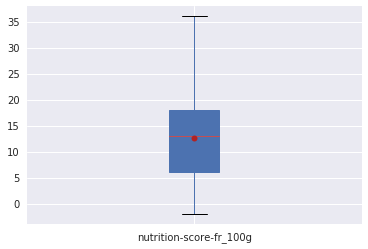

In [61]:
z = pd.DataFrame(df_score_native_uk['nutrition-score-fr_100g']).boxplot(showfliers= False, patch_artist=True, medianprops=medianprops,showmeans=True, meanprops=meanprops)

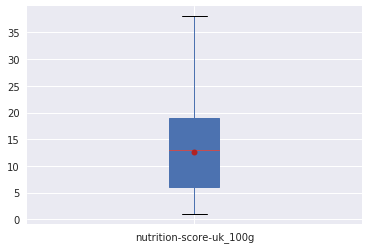

In [62]:
z = pd.DataFrame(df_score_native_uk['nutrition-score-uk_100g']).boxplot(showfliers= False, patch_artist=True, medianprops=medianprops,showmeans=True, meanprops=meanprops)

In [63]:
df_food['native_score_fr'] = df_score_native_fr['nutrition-score-fr_100g']
df_food['native_score_en'] = df_score_native_uk['nutrition-score-uk_100g']
df_dimensions(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (247505,16) 
Utilisation mémoire : 45978742 bytes 
-------oOo-------


(247505, 16)

## Recommandations

In [66]:
score = 'native_score_fr'
df_recomandations_display(df_food, score, countMax=10)

18.0
Dark Chocolate Coconut Chews
Dark Chocolate Sea Salt & Turbinado Almonds
Lion Peanut x2
Milk Chocolate Peanut Butter Malt Balls
Yogurt Pretzels
Chili Mango
Milk Chocolate Pretzels
Butter Croissants
Biscuit
Biscuit

 --------------------- 
6.0
Pain Burger Artisan
Quiche Lorraine
Bolillos
Sliced Plain Bagel
Freshly Baked Italian Loaf
La Brea Bakery Ciabatta Loaf Freshly Baked In Store
Lithuanian Rye Bread
Ryan's, Juice Melange, Fuji Pom Blend
Ryan's, Lemonade
Ryan's, Spiced Apple Cider


# Scoring par pondération

In [68]:
list_nutrient_plus = list_nutrient.copy()

if 'product_name' in list_nutrient_plus :
    list_nutrient_plus.remove('product_name')

if 'energy' in list_nutrient_plus :
    list_nutrient_plus.remove('energy')

if 'fat' in list_nutrient_plus :
    list_nutrient_plus.remove('fat')

if 'saturated-fat' in list_nutrient_plus :
    list_nutrient_plus.remove('saturated-fat')

if 'trans-fat' in list_nutrient_plus :
    list_nutrient_plus.remove('trans-fat')

if 'cholesterol' in list_nutrient_plus :
    list_nutrient_plus.remove('cholesterol')

if 'sugars' in list_nutrient_plus :
    list_nutrient_plus.remove('sugars')

print("\nListe de nutriments à apports positifs pour la santé: {}".format(list_nutrient_plus))    

list_nutrient_minus = list_nutrient.copy()
if 'product_name' in list_nutrient_minus :
    list_nutrient_minus.remove('product_name')

if 'energy' in list_nutrient_minus :
    list_nutrient_minus.remove('energy')

for nutrient in list_nutrient_plus :
    list_nutrient_minus.remove(nutrient)

print("\nListe de nutriments à apports négatifs pour la santé : {}".format(list_nutrient_minus))



Liste de nutriments à apports positifs pour la santé: ['carbohydrates', 'fiber', 'proteins', 'sodium', 'vitamin-a', 'vitamin-c', 'calcium', 'iron']

Liste de nutriments à apports négatifs pour la santé : ['fat', 'saturated-fat', 'cholesterol', 'sugars']


### Contraintes du modèle : cas des hydrates de carbone

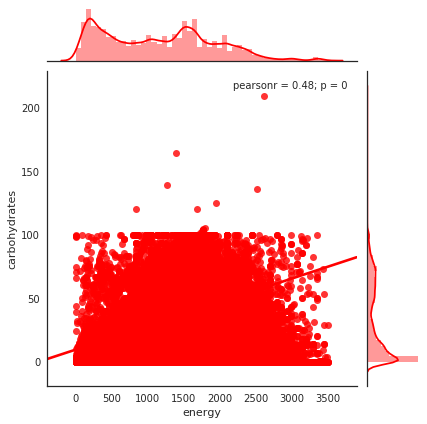

In [69]:
df_sns_joint_plot(df_food,"energy", 'carbohydrates', parameter_color='r')

In [73]:
df_dimensions(df_food)
df_food = df_food[df_food['energy']>0]
df_dimensions(df_food)    

-------oOo-------
Nombre (lignes, colonnes)  = (247505,14) 
Utilisation mémoire : 50407270 bytes 
-------oOo-------
-------oOo-------
Nombre (lignes, colonnes)  = (247505,14) 
Utilisation mémoire : 42018662 bytes 
-------oOo-------


(247505, 14)

### Hydrates de carbone : traitement des outliers

-------oOo-------
Nombre (lignes, colonnes)  = (247505,14) 
Utilisation mémoire : 50407270 bytes 
-------oOo-------
0.0 135.5
-------oOo-------
Nombre (lignes, colonnes)  = (217176,14) 
Utilisation mémoire : 36870736 bytes 
-------oOo-------


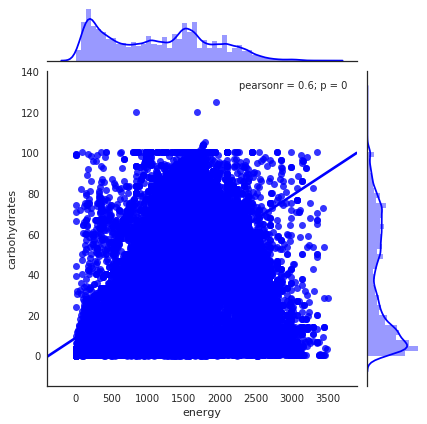

In [75]:
df_dimensions(df_food)
nutrient = 'carbohydrates'
zmin, zmax = df_boxplot_min_max(df_food , nutrient)
print(zmin,zmax)
df_food = df_food[df_food[nutrient]<=zmax ]
df_food = df_food[df_food[nutrient]>=zmin ]
df_food = df_food[df_food[nutrient]> 0 ]
df_dimensions(df_food)
df_sns_joint_plot(df_food,"energy", nutrient, parameter_color='blue')

In [70]:
if 'saturated-fat' in list_nutrient_minus :
    list_nutrient_minus.remove('saturated-fat')

if 'cholesterol' in list_nutrient_minus :    
    list_nutrient_minus.remove('cholesterol')    

list_nutrient_minus

['fat', 'sugars']

-------oOo-------
Nombre (lignes, colonnes)  = (247505,16) 
Utilisation mémoire : 54367350 bytes 
-------oOo-------
-------oOo-------
Nombre (lignes, colonnes)  = (247505,16) 
Utilisation mémoire : 54367350 bytes 
-------oOo-------
-------oOo-------
Nombre (lignes, colonnes)  = (247505,16) 
Utilisation mémoire : 54367350 bytes 
-------oOo-------


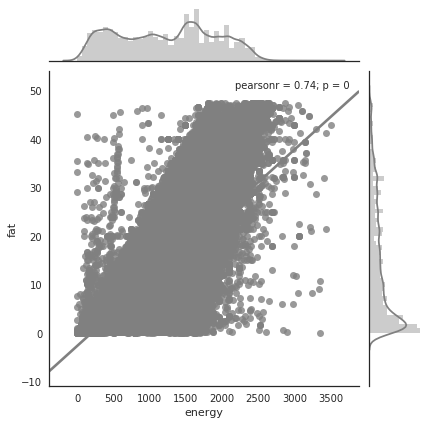

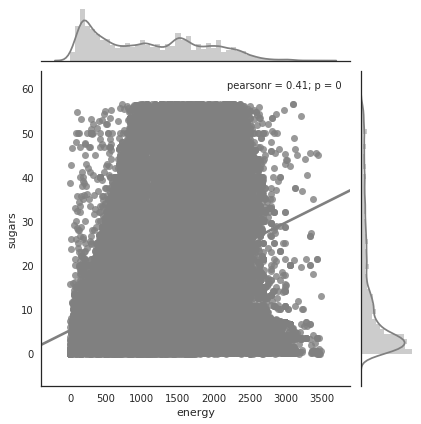

In [71]:
df_display_linear_regression_from_list(df_food, "energy",list_nutrient_minus) 

In [96]:
df_dimensions(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (217176,14) 
Utilisation mémoire : 45259344 bytes 
-------oOo-------


(217176, 14)

### Justifications

Utilisation de la correlation carbonydrates_100g et energy_100g

De par la litterature sur le sujet, les hydrates de carbone sont les nutriments qui contribuent le plus à notre apport énergértique.

Il doit donc y avoir une corrélation entre l'apport énergétique de ce nutriment et la variable energy_100g.


On prend le partie de contraindre le modèle afin d'optimiser cette corrélation linéaire.

# Scoring des aliments

## Poids des nutriments fonction des cantiles

Une table de scoring est calculée.

Pour chacun des nutriments, les quantiles 1/4, 2/4 et 3/4 sont calculés.

Un poids est associé à chaque intervalle inter-quantile dont le signe dépend de la liste (+ ou -).

Le scoring d'un aliment va être la somme cumulée de ces poids.


## Calcul du scoring par aliment : methode 1

Retourne un dataframe qui contient une colonne scoring_1 avec une valeur pour chacun des aliments.

In [72]:
df_scoring_1 = df_build_scoring_from_listing_1(df_food, list_nutrient_minus, list_nutrient_plus)

## Analyse du scoring

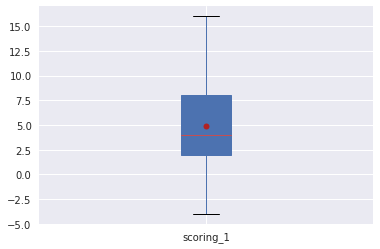

In [73]:
z = df_scoring_1.boxplot(['scoring_1'], showfliers= False, patch_artist=True, medianprops=medianprops,showmeans=True, meanprops=meanprops)

scoring_1    4.0
dtype: float64

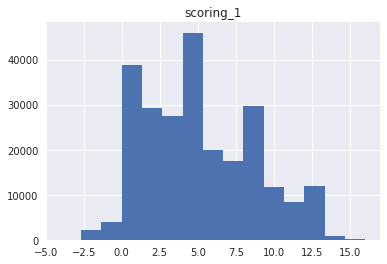

In [74]:
z=df_scoring_1.hist(bins=15)
df_scoring_1.median()

### Aggrégation de scorint_1 à la table des aliments

In [75]:
#df_food = df_save.copy()
df_dimensions(df_food)
if "scoring_1" in df_food :
    del df_food['scoring_1']
df_food = pd.concat([df_food,df_scoring_1], axis=1)
df_dimensions(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (247505,16) 
Utilisation mémoire : 54367350 bytes 
-------oOo-------
-------oOo-------
Nombre (lignes, colonnes)  = (247505,17) 
Utilisation mémoire : 56347390 bytes 
-------oOo-------


(247505, 17)

## Calcul du scoring par aliment : methode 2

Utilisation de l'écat inter-quartile pour la classification des aliments

In [81]:
df_scoring_2 = df_build_scoring_from_listing_2(df_food, list_nutrient_minus, list_nutrient_plus)

## Analyse du scoring

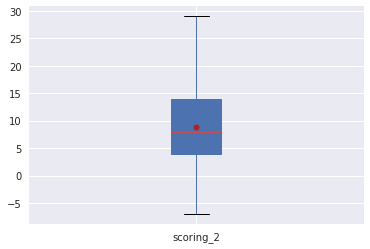

In [82]:
z = df_scoring_2.boxplot(['scoring_2'], showfliers= False, patch_artist=True, medianprops=medianprops,showmeans=True, meanprops=meanprops)

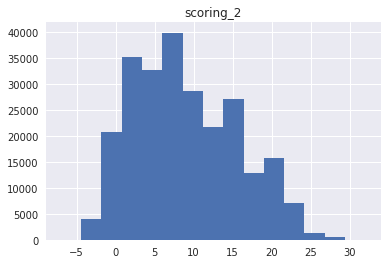

In [83]:
z=df_scoring_2.hist(bins=15)

## Aggregation de la variable scoring au dataframe

In [84]:
#df_food = df_save.copy()
df_dimensions(df_food)
if 'scoring_2' in df_food.columns :
    del(df_food['scoring_2'])
df_food = pd.concat([df_food,df_scoring], axis=1)
df_dimensions(df_food)

-------oOo-------
Nombre (lignes, colonnes)  = (247505,17) 
Utilisation mémoire : 56347390 bytes 
-------oOo-------
-------oOo-------
Nombre (lignes, colonnes)  = (247505,18) 
Utilisation mémoire : 58327430 bytes 
-------oOo-------


(247505, 18)

### Comparaison avec le scoring natif

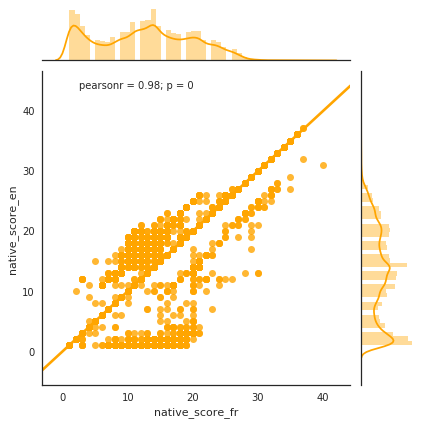

In [85]:
df_sns_joint_plot(df_food,"native_score_fr", 'native_score_en', parameter_color='orange')

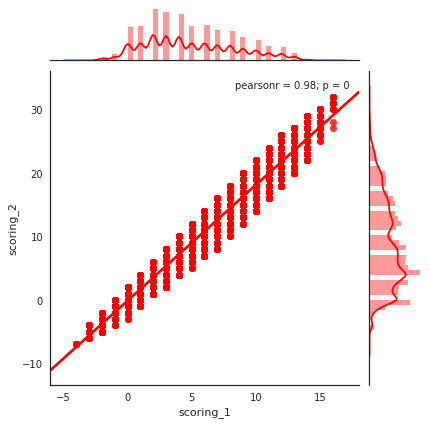

In [89]:
df_sns_joint_plot(df_food,"scoring_1", 'scoring_2', parameter_color='red')

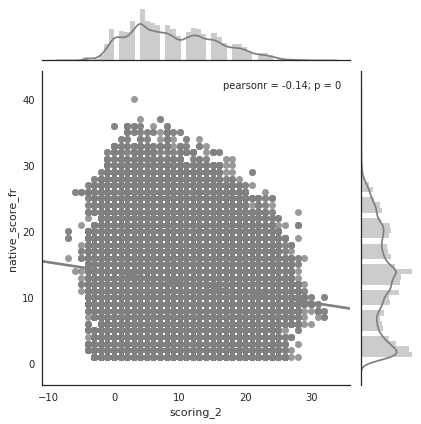

In [90]:
df_sns_joint_plot(df_food, 'scoring_2',"native_score_fr", parameter_color='grey')

# Recommandations sur la base du scoring pondéré

In [91]:
score = 'scoring_1'
df_recomandations_display(df_food, score, countMax=10)

8.0
Peanuts
Organic Salted Nut Mix
Organic Long Grain White Rice
Organic Adzuki Beans
Organic Penne Pasta
Zen Party Mix
Organic Golden Flax Seeds
Organic Hazelnuts
Organic Oat Groats
Energy Power Mix

 --------------------- 
2.0
Sweeteners, Demerara Turbinado Sugar
Marks % Spencer 2 Blueberry Muffins
Sweeteners, Organic Fair Trade Sugar
Vanilla Extract
M&S Extrenely Chocolatey Milk, Dark & White Chocolate Biscuits
diet lemonade by Sainsbury's
Organic Unrefined Mascobado Sugar
Pecan Halves
Veggie Colin the Caterpillar
Belgische Pralinen


In [92]:
score = 'scoring_2'
df_recomandations_display(df_food, score, countMax=10)

14.0
Peanuts
Organic Salted Nut Mix
Organic Long Grain White Rice
Organic Muesli
Organic Adzuki Beans
Organic Penne Pasta
Zen Party Mix
Organic Golden Flax Seeds
Cinnamon Nut Granola
Organic Hazelnuts

 --------------------- 
4.0
Sweeteners, Demerara Turbinado Sugar
Marks % Spencer 2 Blueberry Muffins
Sweeteners, Organic Fair Trade Sugar
Vanilla Extract
M&S Extrenely Chocolatey Milk, Dark & White Chocolate Biscuits
diet lemonade by Sainsbury's
Organic Unrefined Mascobado Sugar
Pecan Halves
Veggie Colin the Caterpillar
Mini Confettis


In [93]:
score = 'native_score_fr'
df_recomandations_display(df_food, score, countMax=10)

18.0
Dark Chocolate Coconut Chews
Dark Chocolate Sea Salt & Turbinado Almonds
Lion Peanut x2
Milk Chocolate Peanut Butter Malt Balls
Yogurt Pretzels
Chili Mango
Milk Chocolate Pretzels
Butter Croissants
Biscuit
Biscuit

 --------------------- 
6.0
Pain Burger Artisan
Quiche Lorraine
Bolillos
Sliced Plain Bagel
Freshly Baked Italian Loaf
La Brea Bakery Ciabatta Loaf Freshly Baked In Store
Lithuanian Rye Bread
Ryan's, Juice Melange, Fuji Pom Blend
Ryan's, Lemonade
Ryan's, Spiced Apple Cider


In [228]:
score = 'native_score_en'
df_recomandations_display(df_food, score, countMax=10)

13.0
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Aliments à base de fruits et de légumes,Produits à tartiner,Petit-déjeuners,Fruits et produits dérivés,Pâtes à tartiner végétaux,Produits à tartiner sucrés,Confitures et marmelades,Confitures,Confitures de fruits,Confitures de fruits rouges,Confitures allégées,Confitures de fraises
MANGUE PASSION
Salame & Cheddar Cheese
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Pains,Croûtons
Viandes,Surgelés,Viandes surgelées,Préparations de viande surgelées
Elites, Premium Pickles, Bread & Butter Chips
cheese crackers
Sweetener
Berry Blast, Chewy Berry Flavored Candies, Wild Berry, Blue Raspberry, Strawberry, Blueberry, Peach Berry
Tandoori Seasoning

 --------------------- 
7.0
Chocolate Cupcakes
Noix décortiquées
Epicerie
Banana Pepper Rings
Mozzarella Cheese
Farine
New Zealand Protein Smoothie Powder, Berry
Muffins
Brioches
Son d'Avoine Bio
